# Moving Averages

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


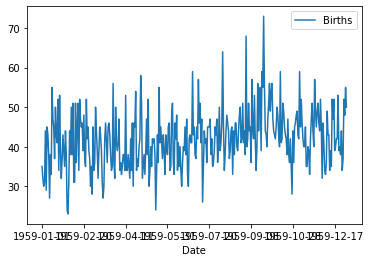

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
print(series.head())
series.plot()
plt.show()

            Births
Date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05    34.4
1959-01-06    33.2
1959-01-07    35.8
1959-01-08    38.4
1959-01-09    39.8
1959-01-10    36.4


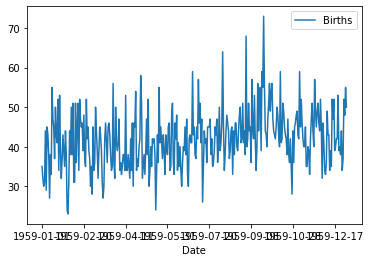

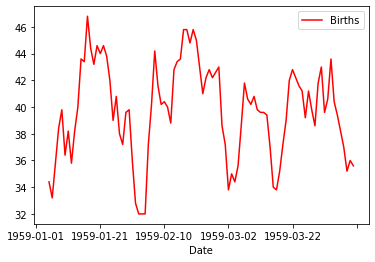

In [2]:
# Tail-rolling average transform
rolling = series[:100].rolling(window=5)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


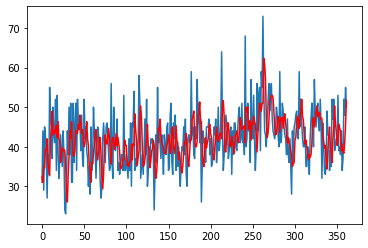

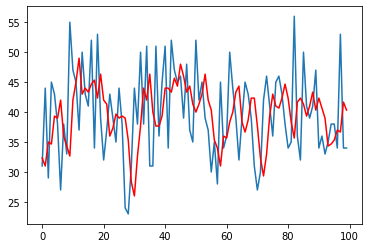

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]


predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

# Simple Exponential Smoothing

In [4]:
data = series.values.reshape(365,)

In [5]:
index = pd.date_range(start='1959', end='1960', freq='D')

In [67]:
final_data = pd.Series(data, index[0:len(index)-1])

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

fit1 = SimpleExpSmoothing(final_data).fit(smoothing_level=0.2,optimized=False)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [8]:
fcast1=fit1.forecast(10)

# Holts Method

In [93]:
from statsmodels.tsa.holtwinters import Holt

init = Holt(final_data)
hlt = init.fit(smoothing_level=0.2,smoothing_trend=0.2,optimized=False)

fcast2=hlt.forecast(10)

In [94]:
from statsmodels.tsa.holtwinters import Holt

init = Holt(final_data, exponential=True)
hlt1 = init.fit(smoothing_level=0.2,smoothing_trend=0.2,optimized=False)

fcast3=hlt1.forecast(10)

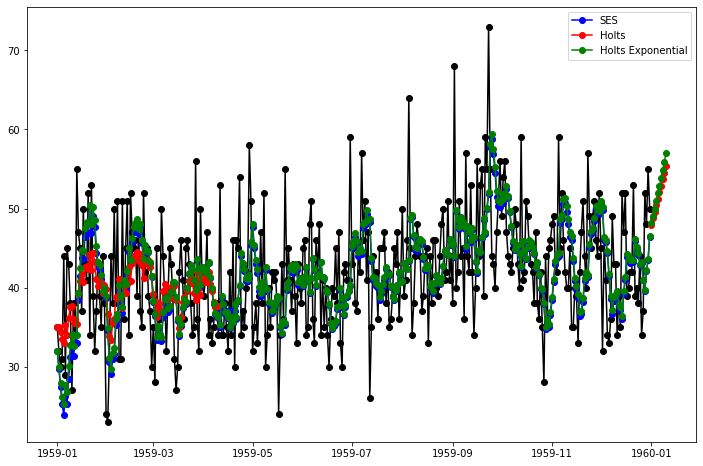

In [95]:
plt.figure(figsize=(12, 8))
plt.plot(final_data, marker='o', color='black')
plt.plot(hlt.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit1.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(hlt1.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], ["SES", "Holts", "Holts Exponential"])

In [96]:
hlt1.aicc,hlt.aicc,fit1.aicc

(1509.0307800199078, 1510.1756984018941, 406.4746651656673)

In [97]:
hlt1.bic,hlt.bic,fit1.bic

(1524.3957325627293, 1525.5406509447157, 411.26395290606456)

# Holt Winters Method

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

init = ExponentialSmoothing(final_data, trend='add',
    damped_trend=True,
    seasonal='add', use_boxcox=True, initialization_method="estimated")
hlt2 = init.fit()

fcast4=hlt1.forecast(10)

In [99]:
hlt1.bic,hlt.bic,fit1.bic, hlt2.bic

(1524.3957325627293,
 1525.5406509447157,
 411.26395290606456,
 1474.4929607116921)

In [102]:
hlt1.aic,hlt.aic,fit1.aic, hlt2.aic

(1508.7961431483993,
 1509.9410615303857,
 406.05361253408836,
 1427.6941924687023)

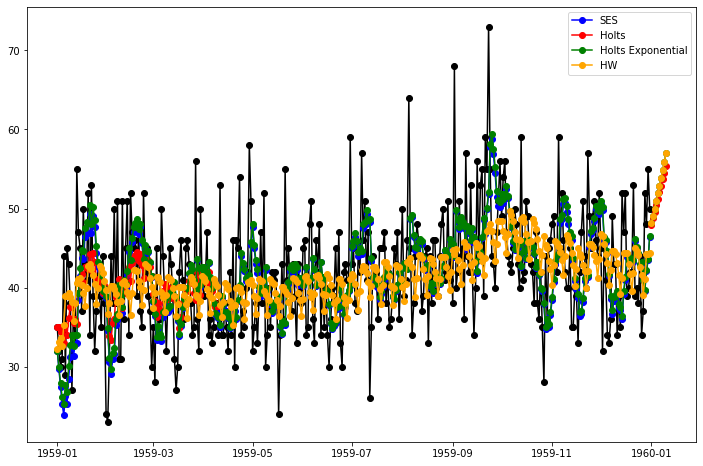

In [101]:
plt.figure(figsize=(12, 8))
plt.plot(final_data, marker='o', color='black')
plt.plot(hlt.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit1.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(hlt1.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.plot(hlt2.fittedvalues, marker='o', color='orange')
line4, = plt.plot(fcast3, marker='o', color='orange')
plt.legend([line1, line2, line3, line4], ["SES", "Holts", "Holts Exponential", "HW"])

# ARIMA

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result=adfuller(sales)
    print(result, "\n\n")
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
    
adfuller_test(final_data)

(-4.808291253559765, 5.2434129901498554e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197) 


ADF Test Statistic : -4.808291253559765
p-value : 5.2434129901498554e-05
#Lags Used : 6
Number of Observations : 358
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


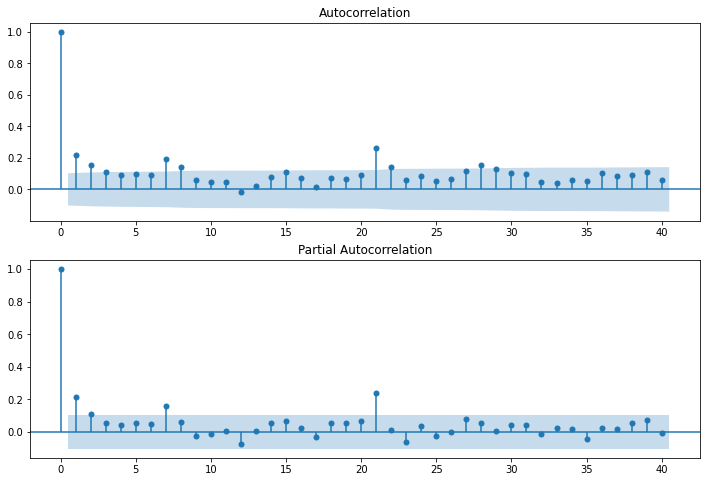

In [73]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(final_data,lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(final_data,lags=40,ax=ax2)

In [77]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(final_data,order=(2,0,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(2, 0)   Log Likelihood               -1234.182
Method:                       css-mle   S.D. of innovations              7.116
Date:                Thu, 18 Mar 2021   AIC                           2476.364
Time:                        12:26:41   BIC                           2491.963
Sample:                    01-01-1959   HQIC                          2482.563
                         - 12-31-1959                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9834      0.537     78.149      0.000      40.930      43.036
ar.L1.y        0.1939      0.052      3.731      0.000       0.092       0.296
ar.L2.y        0.1139      0.052      2.179      0.029       0.011       0.216
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2313           +0.0000j            2.2313            0.0000
AR.2           -3.9335           +0.0000j            3.9335            0.5000
-----------------------------------------------------------------------------
"""

In [88]:
model=ARIMA(final_data,order=(3,0,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(3, 2)   Log Likelihood               -1227.831
Method:                       css-mle   S.D. of innovations              6.989
Date:                Thu, 18 Mar 2021   AIC                           2469.662
Time:                        12:28:58   BIC                           2496.961
Sample:                    01-01-1959   HQIC                          2480.511
                         - 12-31-1959                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7997      1.546     27.034      0.000      38.769      44.830
ar.L1.y        1.0936      1.050      1.042      0.298      -0.964       3.151
ar.L2.y       -0.0571      1.167     -0.049      0.961      -2.345       2.230
ar.L3.y       -0.0450      0.137     -0.328      0.743      -0.314       0.224
ma.L1.y       -0.9405      1.050     -0.895      0.371      -2.999       1.118
ma.L2.y       -0.0170      1.002     -0.017      0.986      -1.981       1.947
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0101           +0.0000j            1.0101            0.0000
AR.2            3.6877           +0.0000j            3.6877            0.0000
AR.3           -5.9661           +0.0000j            5.9661            0.5000
MA.1            1.0436           +0.0000j            1.0436            0.0000
MA.2          -56.5013           +0.0000j           56.5013            0.5000
-----------------------------------------------------------------------------
"""

In [117]:
model=ARIMA(final_data,order=(3,0,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(3, 1)   Log Likelihood               -1227.831
Method:                       css-mle   S.D. of innovations              6.989
Date:                Thu, 18 Mar 2021   AIC                           2467.662
Time:                        12:42:02   BIC                           2491.062
Sample:                    01-01-1959   HQIC                          2476.961
                         - 12-31-1959                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7998      1.546     27.030      0.000      38.769      44.831
ar.L1.y        1.1114      0.057     19.510      0.000       1.000       1.223
ar.L2.y       -0.0768      0.078     -0.983      0.325      -0.230       0.076
ar.L3.y       -0.0429      0.054     -0.788      0.431      -0.149       0.064
ma.L1.y       -0.9583      0.022    -42.724      0.000      -1.002      -0.914
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0100           +0.0000j            1.0100            0.0000
AR.2            3.6056           +0.0000j            3.6056            0.0000
AR.3           -6.4081           +0.0000j            6.4081            0.5000
MA.1            1.0435           +0.0000j            1.0435            0.0000
-----------------------------------------------------------------------------
"""

In [107]:
model=ARIMA(final_data,order=(0,0,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(0, 0)   Log Likelihood               -1245.391
Method:                           css   S.D. of innovations              7.338
Date:                Thu, 18 Mar 2021   AIC                           2494.782
Time:                        12:37:15   BIC                           2502.582
Sample:                    01-01-1959   HQIC                          2497.882
                         - 12-31-1959                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9808      0.384    109.297      0.000      41.228      42.734
==============================================================================
"""

In [112]:
model_fit.aic

2494.781870986389

In [106]:
for i in range(1, 7):
    for j in range(1, 7):
        try:
            model=ARIMA(final_data,order=(i,0,j))
            model_fit=model.fit()
            print(f"AIC = {model_fit.aic}, p={i}, q={j}")
        except:
            pass

AIC = 2468.90579707279, p=1, q=1
AIC = 2466.283266415061, p=2, q=1
AIC = 2467.697832300284, p=2, q=2
AIC = 2467.6621802894315, p=3, q=1
AIC = 2469.661896734685, p=3, q=2
AIC = 2468.41638760402, p=3, q=3
AIC = 2476.7133067732348, p=4, q=1
AIC = 2467.1305645837638, p=4, q=2
AIC = 2470.219143991842, p=4, q=3
AIC = 2469.092244167492, p=4, q=4
AIC = 2480.8630955480858, p=5, q=1
AIC = 2469.020583174586, p=5, q=2
AIC = 2471.3532249640157, p=5, q=3
AIC = 2468.9737924781657, p=5, q=4
AIC = 2463.807826078525, p=5, q=5
AIC = 2473.6303609215265, p=6, q=1
AIC = 2471.003527693015, p=6, q=2
AIC = 2473.240957868853, p=6, q=3
AIC = 2468.583850465705, p=6, q=4
AIC = 2475.627475540401, p=6, q=5


In [124]:
hlt2.forecast(10)

1960-01-01    43.520768
1960-01-02    42.451833
1960-01-03    40.205134
1960-01-04    42.385096
1960-01-05    45.153156
1960-01-06    44.998598
1960-01-07    44.683238
1960-01-08    43.520768
1960-01-09    42.451833
1960-01-10    40.205134
Freq: D, dtype: float64

In [141]:
fcast5 = model_fit.predict(365, 385)

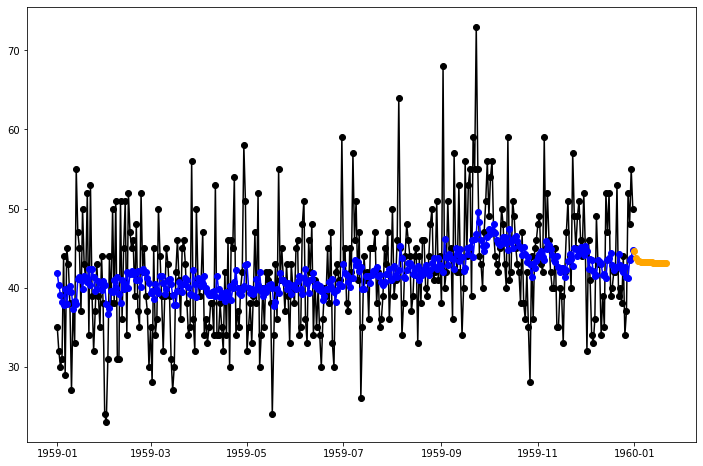

In [142]:
plt.figure(figsize=(12, 8))
plt.plot(final_data, marker='o', color='black')
plt.plot(model_fit.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast5, marker='o', color='orange')

In [143]:
fcast5

1960-01-01    44.656279
1960-01-02    43.778906
1960-01-03    43.428509
1960-01-04    43.335461
1960-01-05    43.296560
1960-01-06    43.275489
1960-01-07    43.259046
1960-01-08    43.244057
1960-01-09    43.229566
1960-01-10    43.215316
1960-01-11    43.201236
1960-01-12    43.187302
1960-01-13    43.173509
1960-01-14    43.159854
1960-01-15    43.146335
1960-01-16    43.132950
1960-01-17    43.119698
1960-01-18    43.106578
1960-01-19    43.093589
1960-01-20    43.080728
1960-01-21    43.067996
Freq: D, dtype: float64